<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/20230720_PAAD_XAI_Local_Global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PAAD - Random Forest - Treatment type**

author: jose.bobes at udc.es

# Importing required libraries

In [1]:
# Importing Required Libraries
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from sklearn import metrics

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

Python: 3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]
scipy: 1.10.1
numpy: 1.22.4
matplotlib: 3.7.1
pandas: 1.5.3
sklearn: 1.2.2


# Preparing the Pancreas data

In [2]:
# Loading Data
url = "https://raw.githubusercontent.com/jrbobes/jrbobes-hitl-ml/master/Libro1_Adapted.csv"
columns = ['ns10:file_uuid','ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_T', 'ns3:pathologic_N', 'ns3:pathologic_M', 'ns3:pathologic_stage', 'ns5:vital_status', 'ns5:days_to_death', 'therapy_type']

dataset = pd.read_csv(url, sep=';', usecols=columns, encoding = "ISO-8859-1")

print(dataset.shape)
print(dataset.head())

(205, 11)
                         ns10:file_uuid ns2:gender                   ns5:race  \
0  1AF64746-0F41-408F-9CB3-D567BEBA1217     FEMALE                      WHITE   
1  0D7B23AC-0988-4E95-9AF3-82180A1DAB0A     FEMALE                      WHITE   
2  290AC731-F653-432D-8C35-8E6C178BD2C6     FEMALE                      WHITE   
3  E2FC1DD6-0B4D-409D-9D1C-0F8E0ADB6113     FEMALE  BLACK OR AFRICAN AMERICAN   
4  40A76730-988D-4FF1-A17A-91AA85DD7C76       MALE                      WHITE   

   ns5:age_at_initial_pathologic_diagnosis ns3:pathologic_stage  \
0                                       53            Stage IIB   
1                                       54            Stage IIA   
2                                       58             Stage IV   
3                                       66            Stage IIA   
4                                       64            Stage IIA   

  ns3:pathologic_T ns3:pathologic_N ns3:pathologic_M ns5:vital_status  \
0               T3         

In [3]:
# Feature Selection
# Split dataset in features and target variables (REF: https://www.datacamp.com/tutorial/decision-tree-classification-python)
feature_cols = ['ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_T', 'ns3:pathologic_N', 'ns3:pathologic_M', 'ns3:pathologic_stage']

X = dataset[feature_cols] # Features
#X = dataset.drop(columns='therapy_type');
X_encoded = pd.get_dummies(X)
y = dataset.therapy_type # Target variable

In [4]:
y

0             Other
1             Other
2             Other
3      Chemotherapy
4             Other
           ...     
200    Chemotherapy
201    Chemotherapy
202           Other
203    Chemotherapy
204           Other
Name: therapy_type, Length: 205, dtype: object

In [5]:
#feature_cols = ['ns10:file_uuid', 'ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_T', 'ns3:pathologic_N', 'ns3:pathologic_M', 'ns3:pathologic_stage','therapy_type']
#Z = dataset[feature_cols] # Features
#Z

# Creating a Random Forest model

In [6]:
# Building Random Forest Model

# Create Random Forest classifer object
rf = RandomForestClassifier(max_samples= 130, max_depth=5, bootstrap=True)

# Normalize the therapy type to only Chemotherapy or Other.
y1 = y.replace('Hormone Therapy', 'Other')
y2 = y1.replace('Vaccine', 'Other')
y = y2.replace('Ancillary', 'Other')

# Train Random Forest Classifer
rf = rf.fit(X_encoded, y)

#Predict the response for test dataset
y_pred = rf.predict(X_encoded)


In [7]:
# Evaluating Model
print("Accuracy: ", metrics.accuracy_score(y, y_pred))

Accuracy:  0.775609756097561


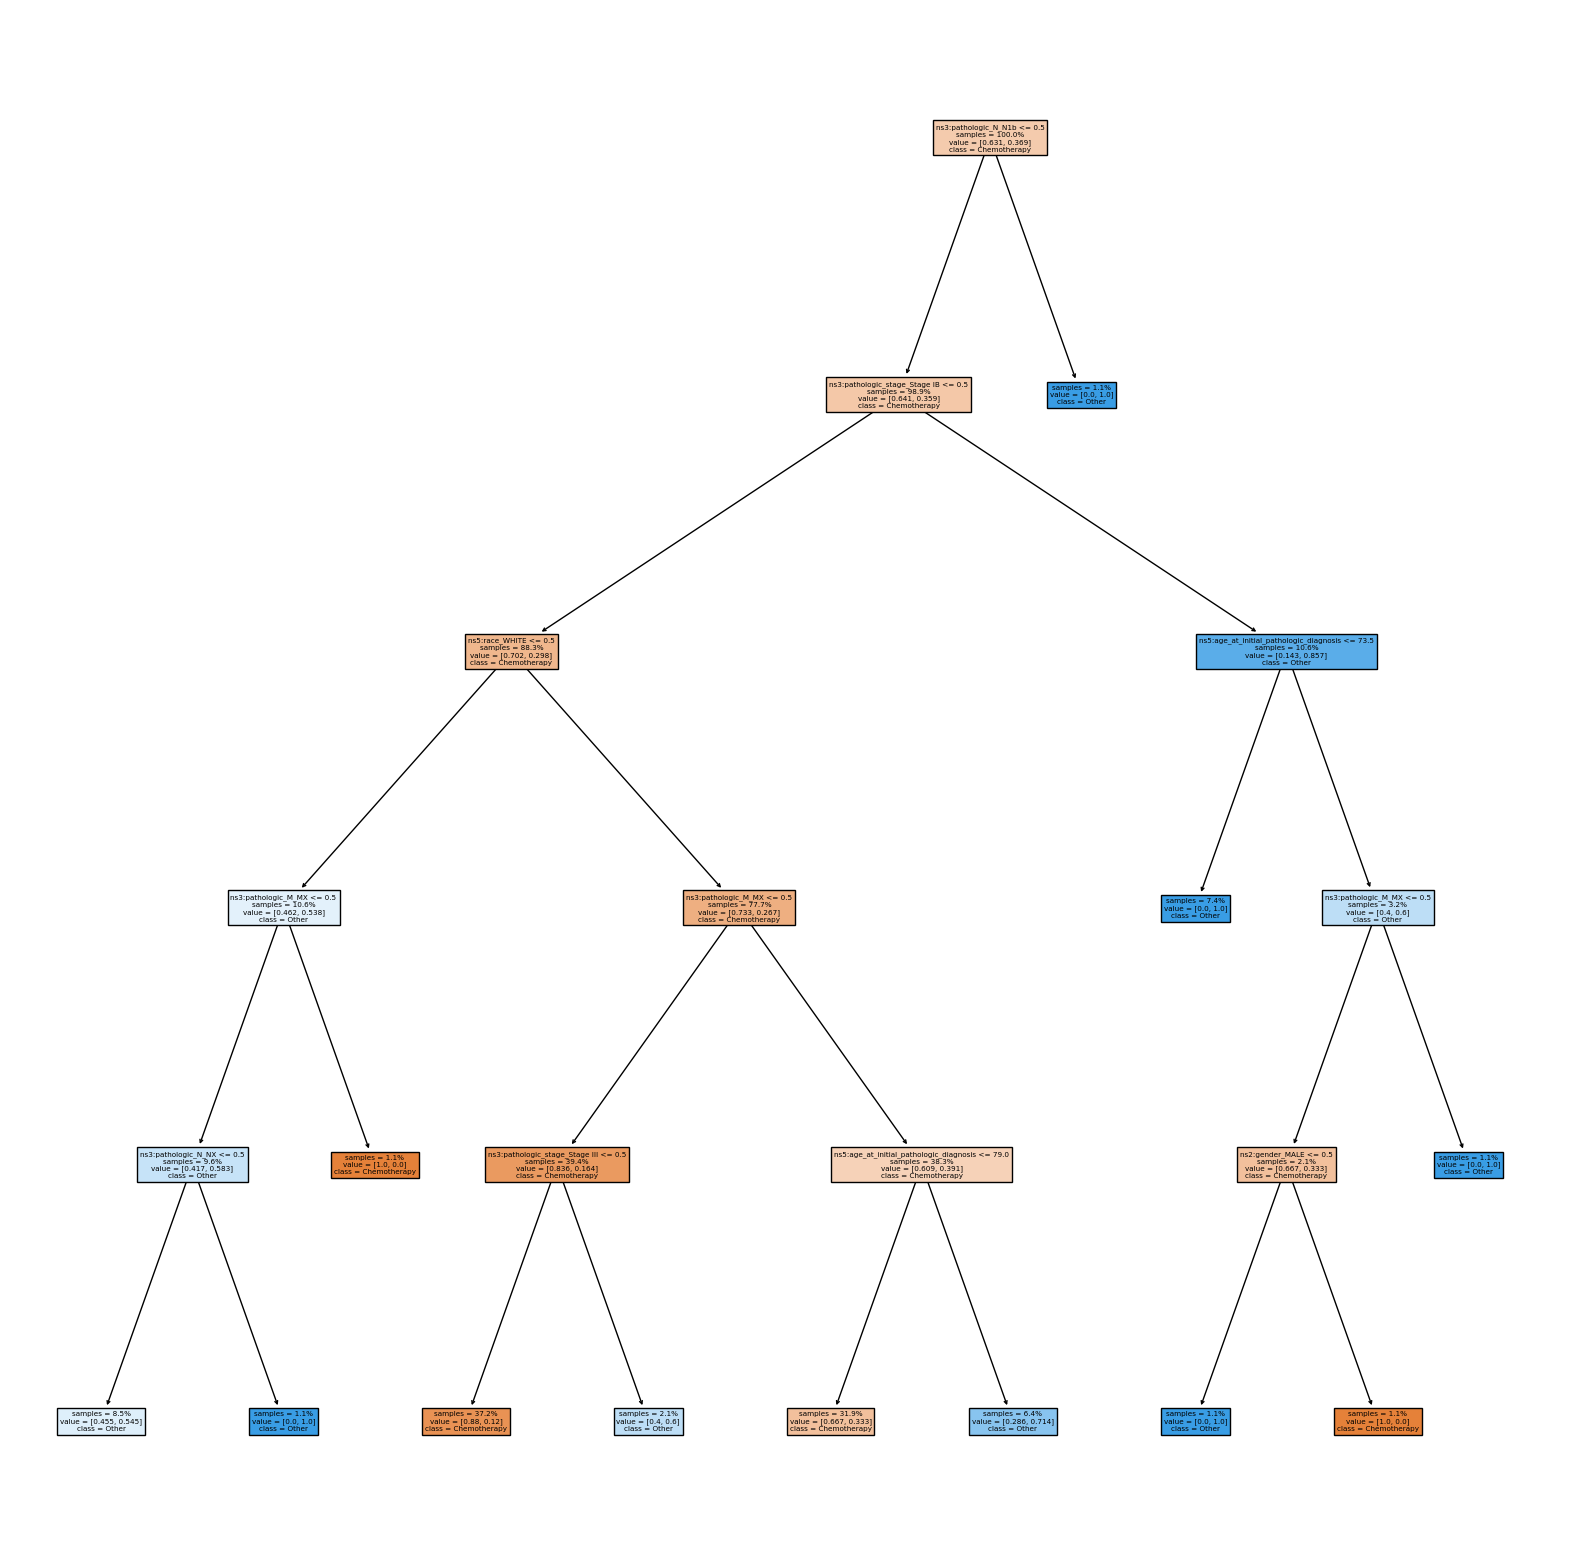

In [8]:
# Visualizing the decision tree
fig = plt.figure(figsize=((20,20)))
plot_tree(rf.estimators_[0],
            feature_names = X_encoded.columns,
            class_names=['Chemotherapy','Other'],
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')

# Exaplainability with SHAP

In [10]:
!pip install shap
import shap

# Explain the model's predictions using SHAP
explainerShap = shap.TreeExplainer(rf)
shap_values = explainerShap.shap_values(X_encoded)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.9 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Paciente 3

In [17]:
paciente3 = X_encoded.loc[[2]]
paciente3

,ns5:age_at_initial_pathologic_diagnosis,ns2:gender_FEMALE,ns2:gender_MALE,ns5:race_ASIAN,ns5:race_BLACK OR AFRICAN AMERICAN,ns5:race_WHITE,ns3:pathologic_T_T1,ns3:pathologic_T_T2,ns3:pathologic_T_T3,ns3:pathologic_T_T4,...,ns3:pathologic_M_M0,ns3:pathologic_M_M1,ns3:pathologic_M_MX,ns3:pathologic_stage_Stage I,ns3:pathologic_stage_Stage IA,ns3:pathologic_stage_Stage IB,ns3:pathologic_stage_Stage IIA,ns3:pathologic_stage_Stage IIB,ns3:pathologic_stage_Stage III,ns3:pathologic_stage_Stage IV
2,58,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [11]:
shap.initjs()
paciente3_shap_values = explainerShap.shap_values(paciente3)

shap.force_plot(explainerShap.expected_value[1], paciente3_shap_values[1], paciente3)

Paciente 4

In [16]:
paciente4 = X_encoded.loc[[3]]
paciente4

,ns5:age_at_initial_pathologic_diagnosis,ns2:gender_FEMALE,ns2:gender_MALE,ns5:race_ASIAN,ns5:race_BLACK OR AFRICAN AMERICAN,ns5:race_WHITE,ns3:pathologic_T_T1,ns3:pathologic_T_T2,ns3:pathologic_T_T3,ns3:pathologic_T_T4,...,ns3:pathologic_M_M0,ns3:pathologic_M_M1,ns3:pathologic_M_MX,ns3:pathologic_stage_Stage I,ns3:pathologic_stage_Stage IA,ns3:pathologic_stage_Stage IB,ns3:pathologic_stage_Stage IIA,ns3:pathologic_stage_Stage IIB,ns3:pathologic_stage_Stage III,ns3:pathologic_stage_Stage IV
3,66,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


No charts were generated by quickchart


In [14]:
shap.initjs()

paciente4_shap_values = explainerShap.shap_values(paciente4)
shap.force_plot(explainerShap.expected_value[1], paciente4_shap_values[1], paciente4)

Summary plot will give us the variable importance plot. Features with high predicting power are shown at the top and the ones with low predicting powers are shown at the bottom.

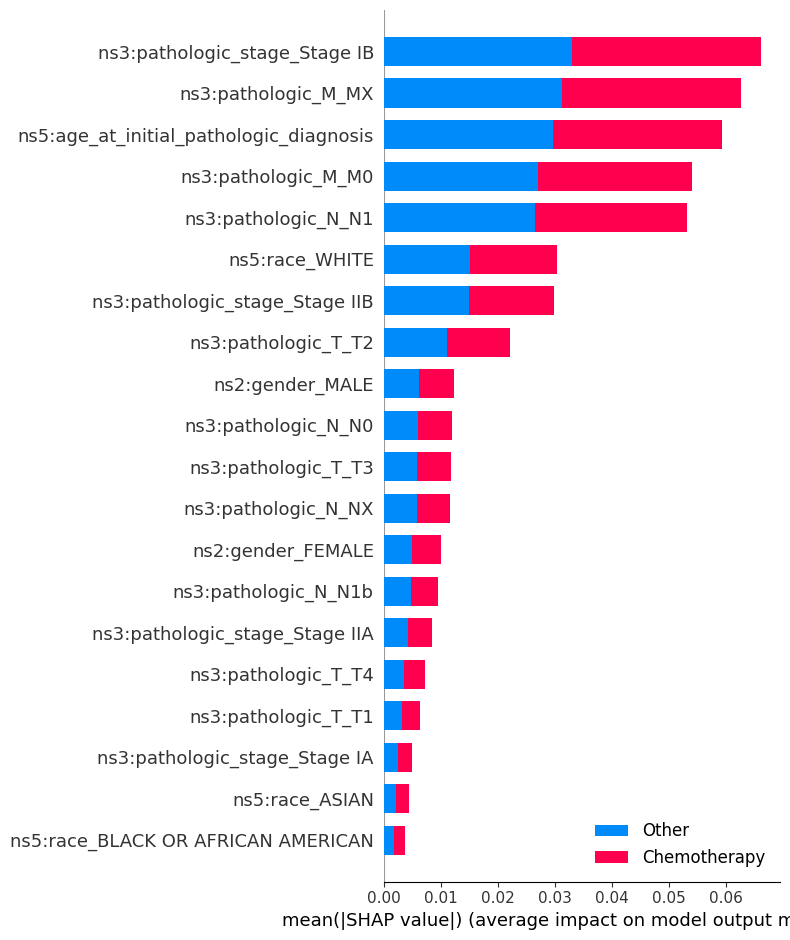

In [13]:
shap.summary_plot(shap_values, X_encoded, plot_type='bar', class_names=['Chemotherapy','Other'])

In [ ]:
# Summary plot in an individual sample
shap.summary_plot(shap_values[1], X_encoded)

Ahora vamos a mostrar el **gráfico de dependencias**
The partial dependence plot is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome.

In [ ]:
shap.dependence_plot(0, shap_values[1], X_encoded, feature_names = X_encoded.columns)

A continuación incluimos un gráfico de decisión:

In [ ]:
i=1
shap.decision_plot(explainerShap.expected_value[i], shap_values[i], feature_names = list(X_encoded.columns))

Y finalmente un gráfico de fuerzas:

In [ ]:
shap.initjs()
i = 1
shap.force_plot(explainerShap.expected_value[i], shap_values[i], feature_names = list(X_encoded.columns))

# Explainability with LIME

In [ ]:
# Install SHAP (SHapley Additive exPlanations).
!pip install lime

# Import required libraries
import lime
import lime.lime_tabular

In [ ]:
# XAI with LIME (Local Interpretable Model-agnostic Explanations)
explainerLime = lime.lime_tabular.LimeTabularExplainer(X_encoded.values, feature_names=X_encoded.columns, class_names = ['Chemotherapy', 'Other'], discretize_continuous=True)

exp = explainerLime.explain_instance(X_encoded.values[1], rf.predict_proba, num_features=10, top_labels=3)
exp.show_in_notebook(show_all=True)
